## Wine Quality DataSet 

- 얼마전 대전 컨벤션 센터에서 열린 세계 와인 페어에 다녀왔다. 우리나라를 포함한 세계 여러나라의 회사들이 참가했고, 자유롭게 시음을 해볼 수 있었다. 평소에 와인을 즐겨마시지 않아 와인 맛을 모르는 나에게 와인은 너무 쓰고 떫고 그냥 맛이 없었다. 그래서 와인 데이터셋을 분석해보고자 한다. 와인의 어떤 성분이 와인의 등급을 정하는지, 좋은 와인의 성분은 어떤 분포를 따르는지 알아보고자 했다. 사실 어떤 와인이 맛이 있는지를 분석해보고 싶었으나, 맛은 주관적이기도 하고 맛에 대한 평가를 나타내는 데이터셋이 없었기 때문에 와인의 등급에 따라 분석해보고자 했다.(As I don't know wine taste, I want to know what ingredients make wine's taste)

In [1]:
import os
from os.path import join

import pandas as pd
import numpy as np
import missingno as msno

import seaborn as sns
sns.set(color_codes=True)

input_dir = 'Dataset'

data = pd.read_csv(join(input_dir,'wine.data.txt'), names =['Class','Alcohol','Malic Acid','Ash','Alcalinity of ash',
                                                               'Magnesium','Total phenols','Flavanoids',
                                                               'Nonflavanoid phenols','Proanthocyanins',
                                                               'Color intensity','Hue','OD280/OD315 of diluted wines',
                                                               'Proline'])

In [2]:
df_data = pd.DataFrame(data)

In [3]:
df_label = df_data['Class']

In [4]:
df_data.head()

,Class,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_data,df_label, test_size=0.33, random_state=42)

### Feature Description

0. 와인의 맛을 이루는 3대 요소는 탄닌(떫은 맛), 산(신맛), 당(단맛)이다. (The three major elements that make up the wine taste are tannins, acid (sour), sugar (sweet).)

1. Alcohol : Degree of Alcohol (알콜 도수)
2. Malic Acid : one of the principal organic acids found in wine grapes. (와인 특유의 신맛을 나타내는 성분) 
3. Ash 영양학에서, 음식물 속에 들어 있는 무기물 또는 그것의 전체 분량에 대한 비율을 이르는 말.(In nutrition, the term refers to the proportion of minerals in food or the total amount of it)
4. Alcalinity of ash
5. Magnesium 
6. Total phenols : 와인에 들어있는 phenols의 전체 양(Total amount of phenols in the wine)
7. Flavonoids :  레드 와인의 페놀 성분 중 최대 90% 비율을 나타내는 폴리 페놀 성분들 플라보노이드 라고 한다. 떫은 맛을 내는 탄닌이 플라보노이드에 속한다.(In red wine, up to 90% of the wine's phenolic content falls under the classification of flavonoids.)
8. Nonflavanoid phenols : 90% 성분을 제외한 10%의 페놀 성분들(10% phenolic content)
9. Proanthocyanins : 심장혈관 질환의 발병률을 낮추는데 도움을 주는 성분.(A component that helps lower the incidence of cardiovascular disease.)
10. Color intensity	
11. Hue : 와인을 잔에 따라 흔들었을 때 와인과 글라스의 경계 부분의 색깔이 다른 정도. Edge 라고도 한다.(When the wine is shaken by the glass, the color of the boundary between wine and glass is different. Also called Edge)
12. OD280/OD315 of diluted wines
13. Proline : 와인의 아미노산 성분 중 가장 많은 양을 차지함(one kind of amino acid)

In [6]:
df_label.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [7]:
class_1 = list()
class_2 = list()
class_3 = list()
for row in df_data.values :
    if row[0] == 1:
        class_1.append(row)
    elif row[0] == 2:
        class_2.append(row)
    else :
        class_3.append(row)
df_class_1 = pd.DataFrame(class_1, columns = df_data.columns)
df_class_2 = pd.DataFrame(class_2, columns = df_data.columns)
df_class_3 = pd.DataFrame(class_3, columns = df_data.columns)

In [8]:
del df_class_1['Class']
del df_class_2['Class']
del df_class_3['Class']
del df_data['Class']

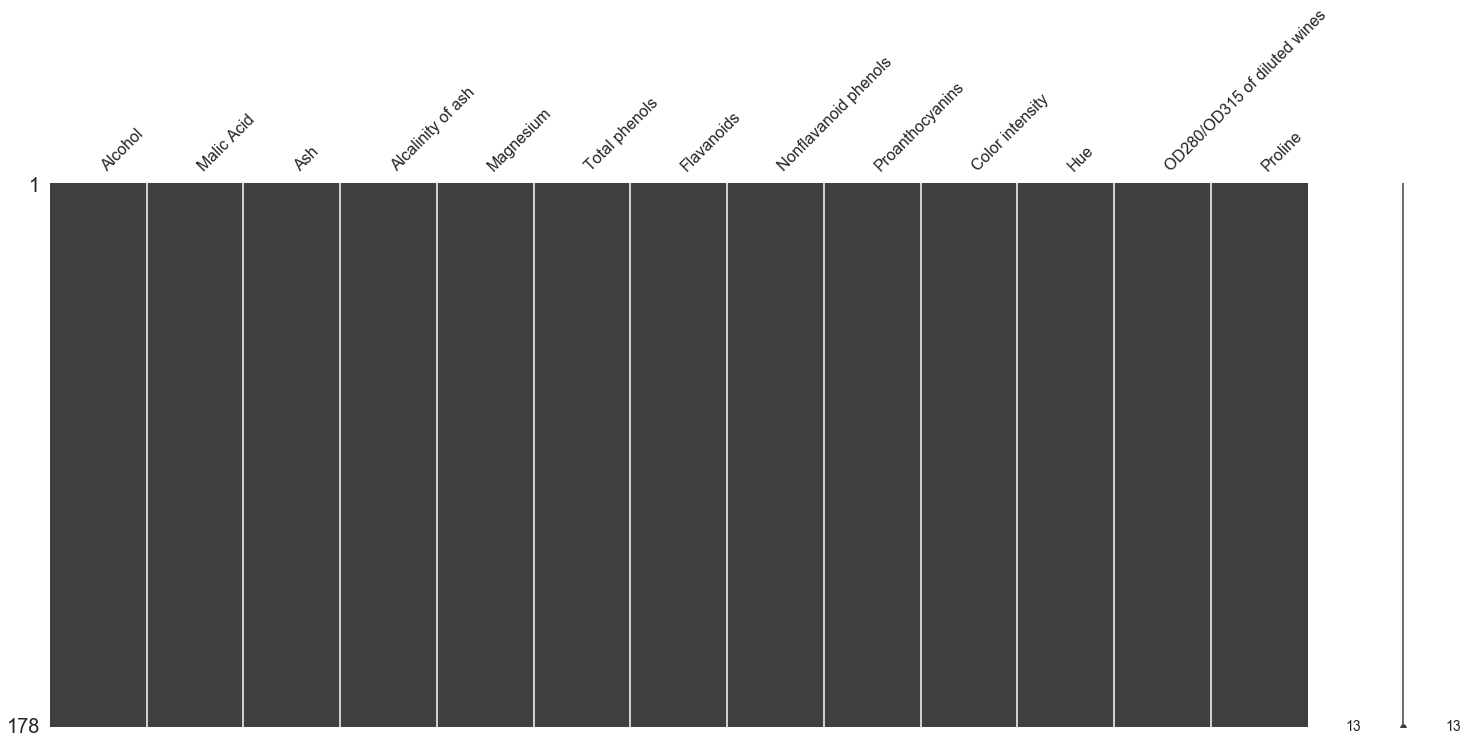

In [9]:
msno.matrix(df_data)

와인 데이터셋은 결측치를 가지고 있지 않았다.
(Wine Dataset doesn't have Null Values

이제 평균과 중간값을 값의 분포와 함께 확인해보자
(Let's check mean & median with feature distribution)

In [10]:
means = list()

In [11]:
means.append(df_class_1.mean())
means.append(df_class_2.mean())
means.append(df_class_3.mean())

In [12]:
df_means = pd.DataFrame(means, columns = df_class_1.columns,
                        index = range(1,4))
df_means

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


In [13]:
medians = list()
medians.append(df_class_1.median())
medians.append(df_class_2.median())
medians.append(df_class_3.median())

In [14]:
df_medians = pd.DataFrame(medians, columns = df_class_1.columns,
                        index = range(1,4))
df_medians

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
1,13.750,1.770,2.44,16.8,104.0,2.800,2.980,0.29,1.870,5.40,1.070,3.17,1095.0
2,12.290,1.610,2.24,20.0,88.0,2.200,2.030,0.37,1.610,2.90,1.040,2.83,495.0
3,13.165,3.265,2.38,21.0,97.0,1.635,0.685,0.47,1.105,7.55,0.665,1.66,627.5


Text(0.5,1,'Alcohol Dist')

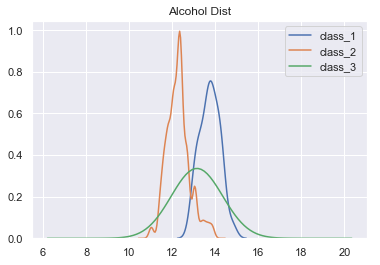

In [15]:
sns.kdeplot(df_class_1['Alcohol'], label = 'class_1')
sns.kdeplot(df_class_2['Alcohol'], bw=.2, label='class_2')
sns.kdeplot(df_class_3['Alcohol'], bw=2, label='class_3').set_title('Alcohol Dist')

In [16]:
print('Mean')
print(df_means['Alcohol'].values)
print('Median')
print(df_medians['Alcohol'].values)

Mean
[13.74474576 12.27873239 13.15375   ]
Median
[13.75  12.29  13.165]


Text(0.5,1,'Malic Acid Dist')

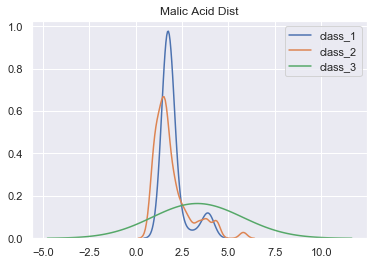

In [17]:
sns.kdeplot(df_class_1['Malic Acid'], label = 'class_1')
sns.kdeplot(df_class_2['Malic Acid'], bw=.2, label='class_2')
sns.kdeplot(df_class_3['Malic Acid'], bw=2, label='class_3').set_title('Malic Acid Dist')

In [18]:
print('Mean')
print(df_means['Malic Acid'].values)
print('Median')
print(df_medians['Malic Acid'].values)

Mean
[2.01067797 1.93267606 3.33375   ]
Median
[1.77  1.61  3.265]


Text(0.5,1,'Ash Dist')

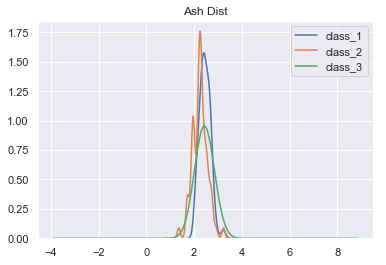

In [19]:
sns.kdeplot(df_class_1['Ash'], label = 'class_1')
sns.kdeplot(df_class_2['Ash'], bw=.2, label='class_2')
sns.kdeplot(df_class_3['Ash'], bw=2, label='class_3').set_title('Ash Dist')

In [20]:
print('Mean')
print(df_means['Ash'].values)
print('Median')
print(df_medians['Ash'].values)

Mean
[2.45559322 2.24478873 2.43708333]
Median
[2.44 2.24 2.38]


Text(0.5,1,'Alcalinity of ash Dist')

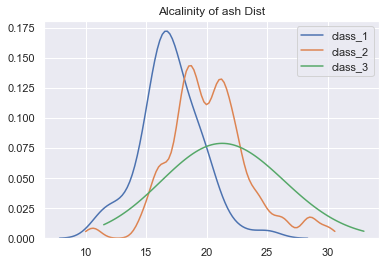

In [21]:
sns.kdeplot(df_class_1['Alcalinity of ash'], label = 'class_1')
sns.kdeplot(df_class_2['Alcalinity of ash'], bw=.2, label='class_2')
sns.kdeplot(df_class_3['Alcalinity of ash'], bw=2, label='class_3').set_title('Alcalinity of ash Dist')

In [22]:
print('Mean')
print(df_means['Alcalinity of ash'].values)
print('Median')
print(df_medians['Alcalinity of ash'].values)

Mean
[17.03728814 20.23802817 21.41666667]
Median
[16.8 20.  21. ]


Text(0.5,1,'Magnesium Dist')

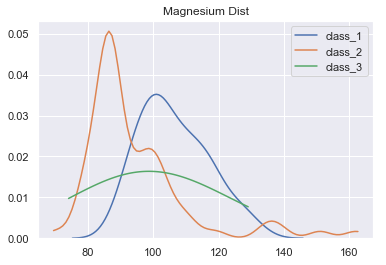

In [23]:
sns.kdeplot(df_class_1['Magnesium'], label = 'class_1')
sns.kdeplot(df_class_2['Magnesium'], bw=.2, label='class_2')
sns.kdeplot(df_class_3['Magnesium'], bw=2, label='class_3').set_title('Magnesium Dist')

In [24]:
print('Mean')
print(df_means['Magnesium'].values)
print('Median')
print(df_medians['Magnesium'].values)

Mean
[106.33898305  94.54929577  99.3125    ]
Median
[104.  88.  97.]


Text(0.5,1,'Total phenols Dist')

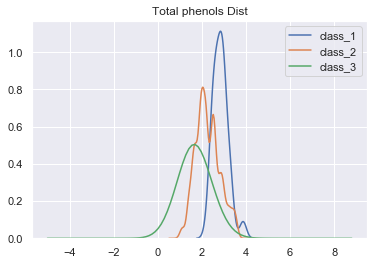

In [25]:
sns.kdeplot(df_class_1['Total phenols'], label = 'class_1')
sns.kdeplot(df_class_2['Total phenols'], bw=.2, label='class_2')
sns.kdeplot(df_class_3['Total phenols'], bw=2, label='class_3').set_title('Total phenols Dist')

In [26]:
print('Mean')
print(df_means['Total phenols'].values)
print('Median')
print(df_medians['Total phenols'].values)

Mean
[2.84016949 2.25887324 1.67875   ]
Median
[2.8   2.2   1.635]


Text(0.5,1,'Flavanoids Dist')

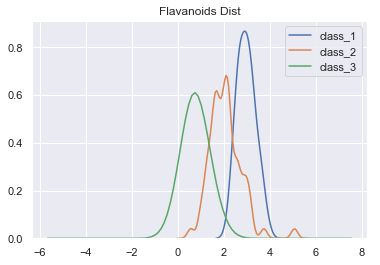

In [27]:
sns.kdeplot(df_class_1['Flavanoids'], label = 'class_1')
sns.kdeplot(df_class_2['Flavanoids'], bw=.2, label='class_2')
sns.kdeplot(df_class_3['Flavanoids'], bw=2, label='class_3').set_title('Flavanoids Dist')

In [28]:
print('Mean')
print(df_means['Flavanoids'].values)
print('Median')
print(df_medians['Flavanoids'].values)

Mean
[2.98237288 2.08084507 0.78145833]
Median
[2.98  2.03  0.685]


Text(0.5,1,'Nonflavanoid phenols Dist')

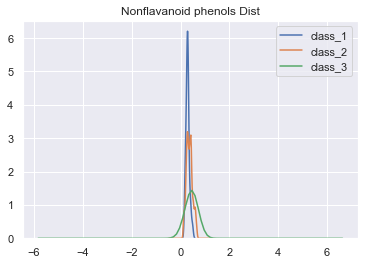

In [29]:
sns.kdeplot(df_class_1['Nonflavanoid phenols'], label = 'class_1')
sns.kdeplot(df_class_2['Nonflavanoid phenols'], bw=.2, label='class_2')
sns.kdeplot(df_class_3['Nonflavanoid phenols'], bw=2, label='class_3').set_title('Nonflavanoid phenols Dist')

In [30]:
print('Mean')
print(df_means['Nonflavanoid phenols'].values)
print('Median')
print(df_medians['Nonflavanoid phenols'].values)

Mean
[0.29       0.36366197 0.4475    ]
Median
[0.29 0.37 0.47]


Text(0.5,1,'Proanthocyanins Dist')

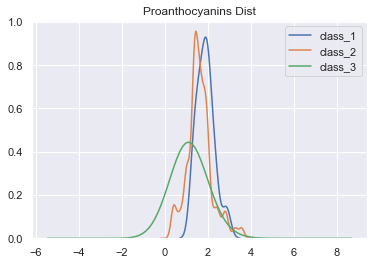

In [31]:
sns.kdeplot(df_class_1['Proanthocyanins'], label = 'class_1')
sns.kdeplot(df_class_2['Proanthocyanins'], bw=.2, label='class_2')
sns.kdeplot(df_class_3['Proanthocyanins'], bw=2, label='class_3').set_title('Proanthocyanins Dist')

In [32]:
print('Mean')
print(df_means['Proanthocyanins'].values)
print('Median')
print(df_medians['Proanthocyanins'].values)

Mean
[1.89932203 1.63028169 1.15354167]
Median
[1.87  1.61  1.105]


Text(0.5,1,'Color intensity Dist')

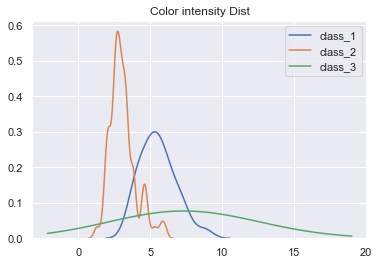

In [33]:
sns.kdeplot(df_class_1['Color intensity'], label = 'class_1')
sns.kdeplot(df_class_2['Color intensity'], bw=.2, label='class_2')
sns.kdeplot(df_class_3['Color intensity'], bw=2, label='class_3').set_title('Color intensity Dist')

In [34]:
print('Mean')
print(df_means['Color intensity'].values)
print('Median')
print(df_medians['Color intensity'].values)

Mean
[5.52830508 3.08661972 7.39624998]
Median
[5.4  2.9  7.55]


Text(0.5,1,'Hue Dist')

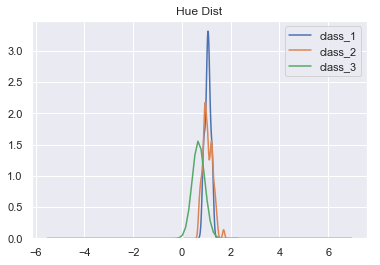

In [35]:
sns.kdeplot(df_class_1['Hue'], label = 'class_1')
sns.kdeplot(df_class_2['Hue'], bw=.2, label='class_2')
sns.kdeplot(df_class_3['Hue'], bw=2, label='class_3').set_title('Hue Dist')

In [36]:
print('Mean')
print(df_means['Hue'].values)
print('Median')
print(df_medians['Hue'].values)

Mean
[1.0620339  1.05628169 0.68270833]
Median
[1.07  1.04  0.665]


Text(0.5,1,'OD280/OD315 of diluted wines Dist')

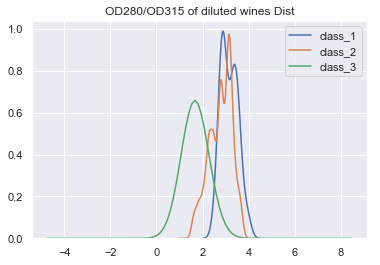

In [37]:
sns.kdeplot(df_class_1['OD280/OD315 of diluted wines'], label = 'class_1')
sns.kdeplot(df_class_2['OD280/OD315 of diluted wines'], bw=.2, label='class_2')
sns.kdeplot(df_class_3['OD280/OD315 of diluted wines'], bw=2, label='class_3').set_title('OD280/OD315 of diluted wines Dist')

In [38]:
print('Mean')
print(df_means['OD280/OD315 of diluted wines'].values)
print('Median')
print(df_medians['OD280/OD315 of diluted wines'].values)

Mean
[3.15779661 2.78535211 1.68354167]
Median
[3.17 2.83 1.66]


Text(0.5,1,'Proline Dist')

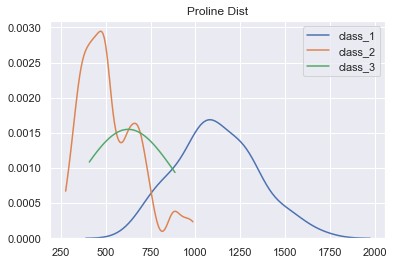

In [39]:
sns.kdeplot(df_class_1['Proline'], label = 'class_1')
sns.kdeplot(df_class_2['Proline'], bw=.2, label='class_2')
sns.kdeplot(df_class_3['Proline'], bw=2, label='class_3').set_title('Proline Dist')

In [40]:
print('Mean')
print(df_means['Proline'].values)
print('Median')
print(df_medians['Proline'].values)

Mean
[1115.71186441  519.50704225  629.89583333]
Median
[1095.   495.   627.5]


클래스 별로 각 feature들이 나타내는 분포의 특성을 확인할 수 있었다.
(We could confirm the distribution characteristics of each feature by class.)
이제 여러 분류기로 클래스 1,2,3 에 대한 분류를 해보자.
(Let's now classify classes 1, 2, and 3 as multiple classifiers.)

In [41]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression()
clf1.fit(X_train, y_train)
clf1.score(X_test,y_test)

1.0

In [42]:
from sklearn.svm import SVC
clf2 = SVC(kernel='linear')
clf2.fit(X_train, y_train)
clf2.score(X_test,y_test)

1.0

In [43]:
from sklearn.ensemble import RandomForestClassifier
clf3 = RandomForestClassifier(max_depth = 5)
clf3.fit(X_train, y_train)
clf3.score(X_test,y_test)

0.9830508474576272

In [44]:
from sklearn.linear_model import RidgeClassifier
clf4 = RidgeClassifier()
clf4.fit(X_train, y_train)
clf4.score(X_test,y_test)

0.9830508474576272

In [45]:
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(estimators=[('lr', clf1),('svm',clf2),('RF', clf3),('Ridge',clf4)])
eclf.fit(X_train, y_train)
eclf.score(X_test,y_test)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


1.0